1.比賽簡介:
二元分類Tabular pulsar database 中每個id是脈衝星的機率，評分方式使用logloss
脈衝星對於天文學研究有很大的意義，可以幫助我們瞭解更多有關宇宙和恆星的知識。
-
2.為什麼選擇這個比賽:
二元分類問題是機器學習中非常常見的問題之一，在許多領域中都能應用。因此，學習如何做二元分類數據對未來職業發展非常有益。現實生活中，也存在許多需要二元分類的問題，像是垃圾郵件分類、股票漲跌預測等。學習如何做二元分類數據可以幫助解決這些問題。
-
3.資料集、目標介紹:
Tabular pulsar database 是一個包含脈衝星數據的資料集，其中包含八個數值型特徵，如脈衝信號強度、光譜訊息等，而 Class 則代表每個 ID 是否為脈衝星。我們的任務是對於測試集中的每個 ID 預測其對應的目標類別 (Class) 值。為此，我們可以使用 Tabular pulsar database 中的特徵來建立預測模型。
-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Math
from sklearn.metrics import log_loss

%config InlineBackend.figure_format='retina'


In [2]:
train=pd.read_csv('./train.csv')
train
test=pd.read_csv('./test.csv')
print('train shape:',train.shape)
print('test shape:',test.shape)

train.info() #確認沒有遺失值
train.columns

train shape: (117564, 10)
test shape: (78377, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    117564 non-null  int64  
 1   Mean_Integrated       117564 non-null  float64
 2   SD                    117564 non-null  float64
 3   EK                    117564 non-null  float64
 4   Skewness              117564 non-null  float64
 5   Mean_DMSNR_Curve      117564 non-null  float64
 6   SD_DMSNR_Curve        117564 non-null  float64
 7   EK_DMSNR_Curve        117564 non-null  float64
 8   Skewness_DMSNR_Curve  117564 non-null  float64
 9   Class                 117564 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 9.0 MB


Index(['id', 'Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class'],
      dtype='object')

In [32]:
test.head()

id  Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0  117564       140.046875  54.507800  0.058862 -0.567263          2.337793   
1  117565       107.828125  51.578965  0.284368 -0.338430          1.574415   
2  117566       135.062500  49.812343 -0.087784 -0.094341          3.576923   
3  117567       112.812500  41.926647  0.519921  1.287762          6.669732   
4  117568        96.210938  35.322620  0.481286  2.443080          2.218227   

   SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  
0       14.868335        9.591760            117.988781  
1       12.501437       11.694968            182.704822  
2       21.243336        7.252386             59.021499  
3       29.013153        5.097661             27.105240  
4       17.041064        9.766006            117.131775

In [33]:
train.head()

id  Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0   0       133.171875  59.716081  0.043133 -0.703383         54.917224   
1   1        87.093750  36.257973  0.435469  2.266057          3.417224   
2   2       112.640625  39.818393  0.379639  0.922306          2.730769   
3   3       120.679688  45.918448 -0.098490  0.011775          2.696488   
4   4       134.070312  57.720107 -0.107772 -0.573335          1.107860   

   SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0       70.084438        0.749798             -0.649512      0  
1       21.865069        7.039330             52.686251      0  
2       15.689690        8.193471             85.649785      0  
3       20.954662        8.183874             70.332899      0  
4       11.255051       16.107748            308.753765      0

In [34]:
train.describe()

id  Mean_Integrated             SD             EK  \
count  117564.000000    117564.000000  117564.000000  117564.000000   
mean    58781.500000       111.248300      46.713535       0.503498   
std     33937.947861        24.906474       6.102941       1.127093   
min         0.000000         6.054688      24.783273      -1.730782   
25%     29390.750000       104.546875      43.443390       0.049761   
50%     58781.500000       116.664062      47.478932       0.186498   
75%     88172.250000       126.296875      50.862718       0.395620   
max    117563.000000       189.367188      93.602933       7.879628   

            Skewness  Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  \
count  117564.000000     117564.000000   117564.000000   117564.000000   
mean        1.886385         11.962921       26.190678        8.037488   
std         6.515466         26.719946       20.041937        3.840980   
min        -1.791886          0.213211        7.370432       -2.597872   
25%        -0.188956          2.090301       14.955405        6.742911   
50%         0.091720          2.808528       18.164924        8.442883   
75%         0.691613          4.122910       24.732218       10.003237   
max        65.385974        217.371238      109.890785       34.539844   

       Skewness_DMSNR_Curve          Class  
count         117564.000000  117564.000000  
mean              93.881076       0.093285  
std               79.962110       0.290833  
min               -1.976976       0.000000  
25%               49.409136       0.000000  
50%               83.421375       0.000000  
75%              122.093290       0.000000  
max             1191.000837       1.000000

由此可知id跟我們要預測的不大相關，故將id移除

In [35]:
train=train.drop('id',axis='columns')

繪製train資料中類別class裡0跟1數量的長條圖

<Axes: xlabel='Class', ylabel='count'>

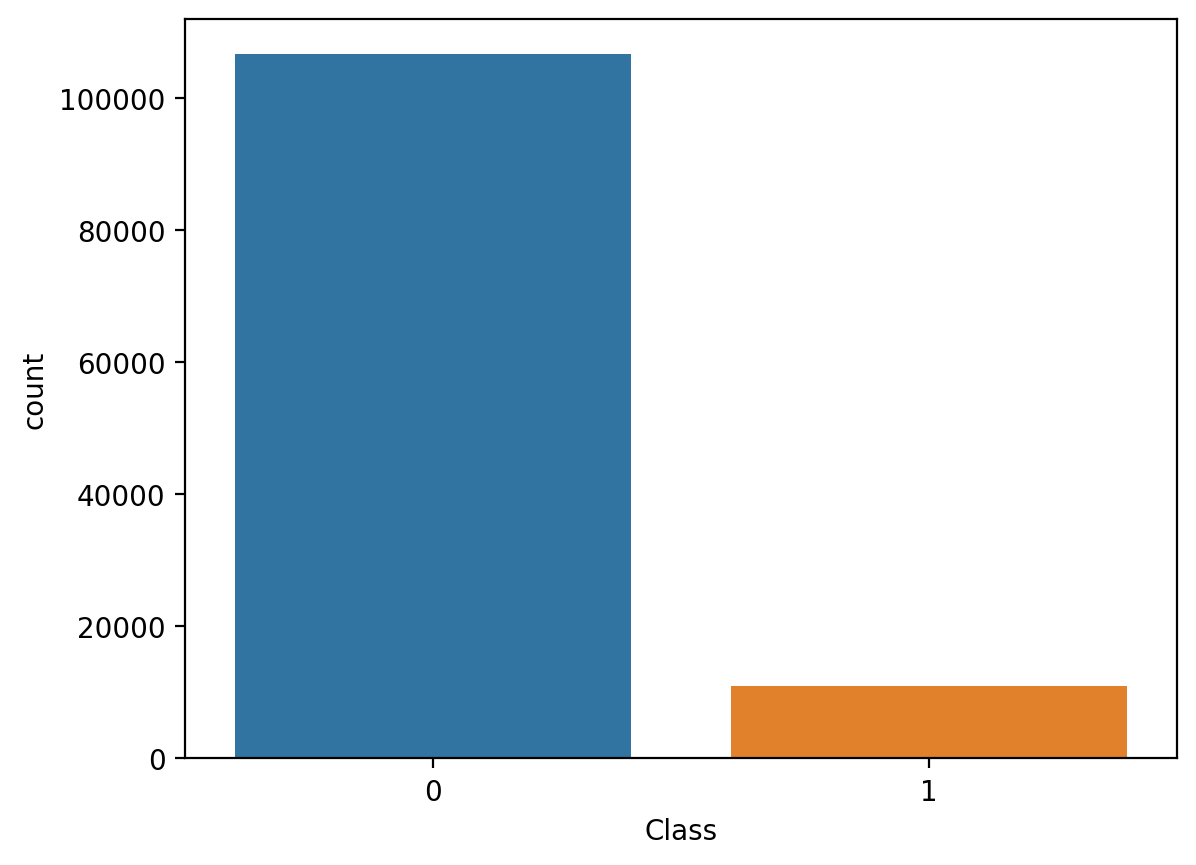

In [36]:
sns.countplot(x="Class",data=train) 

繪製箱型圖
分析每個特徵的分布狀況以及是否有離群值

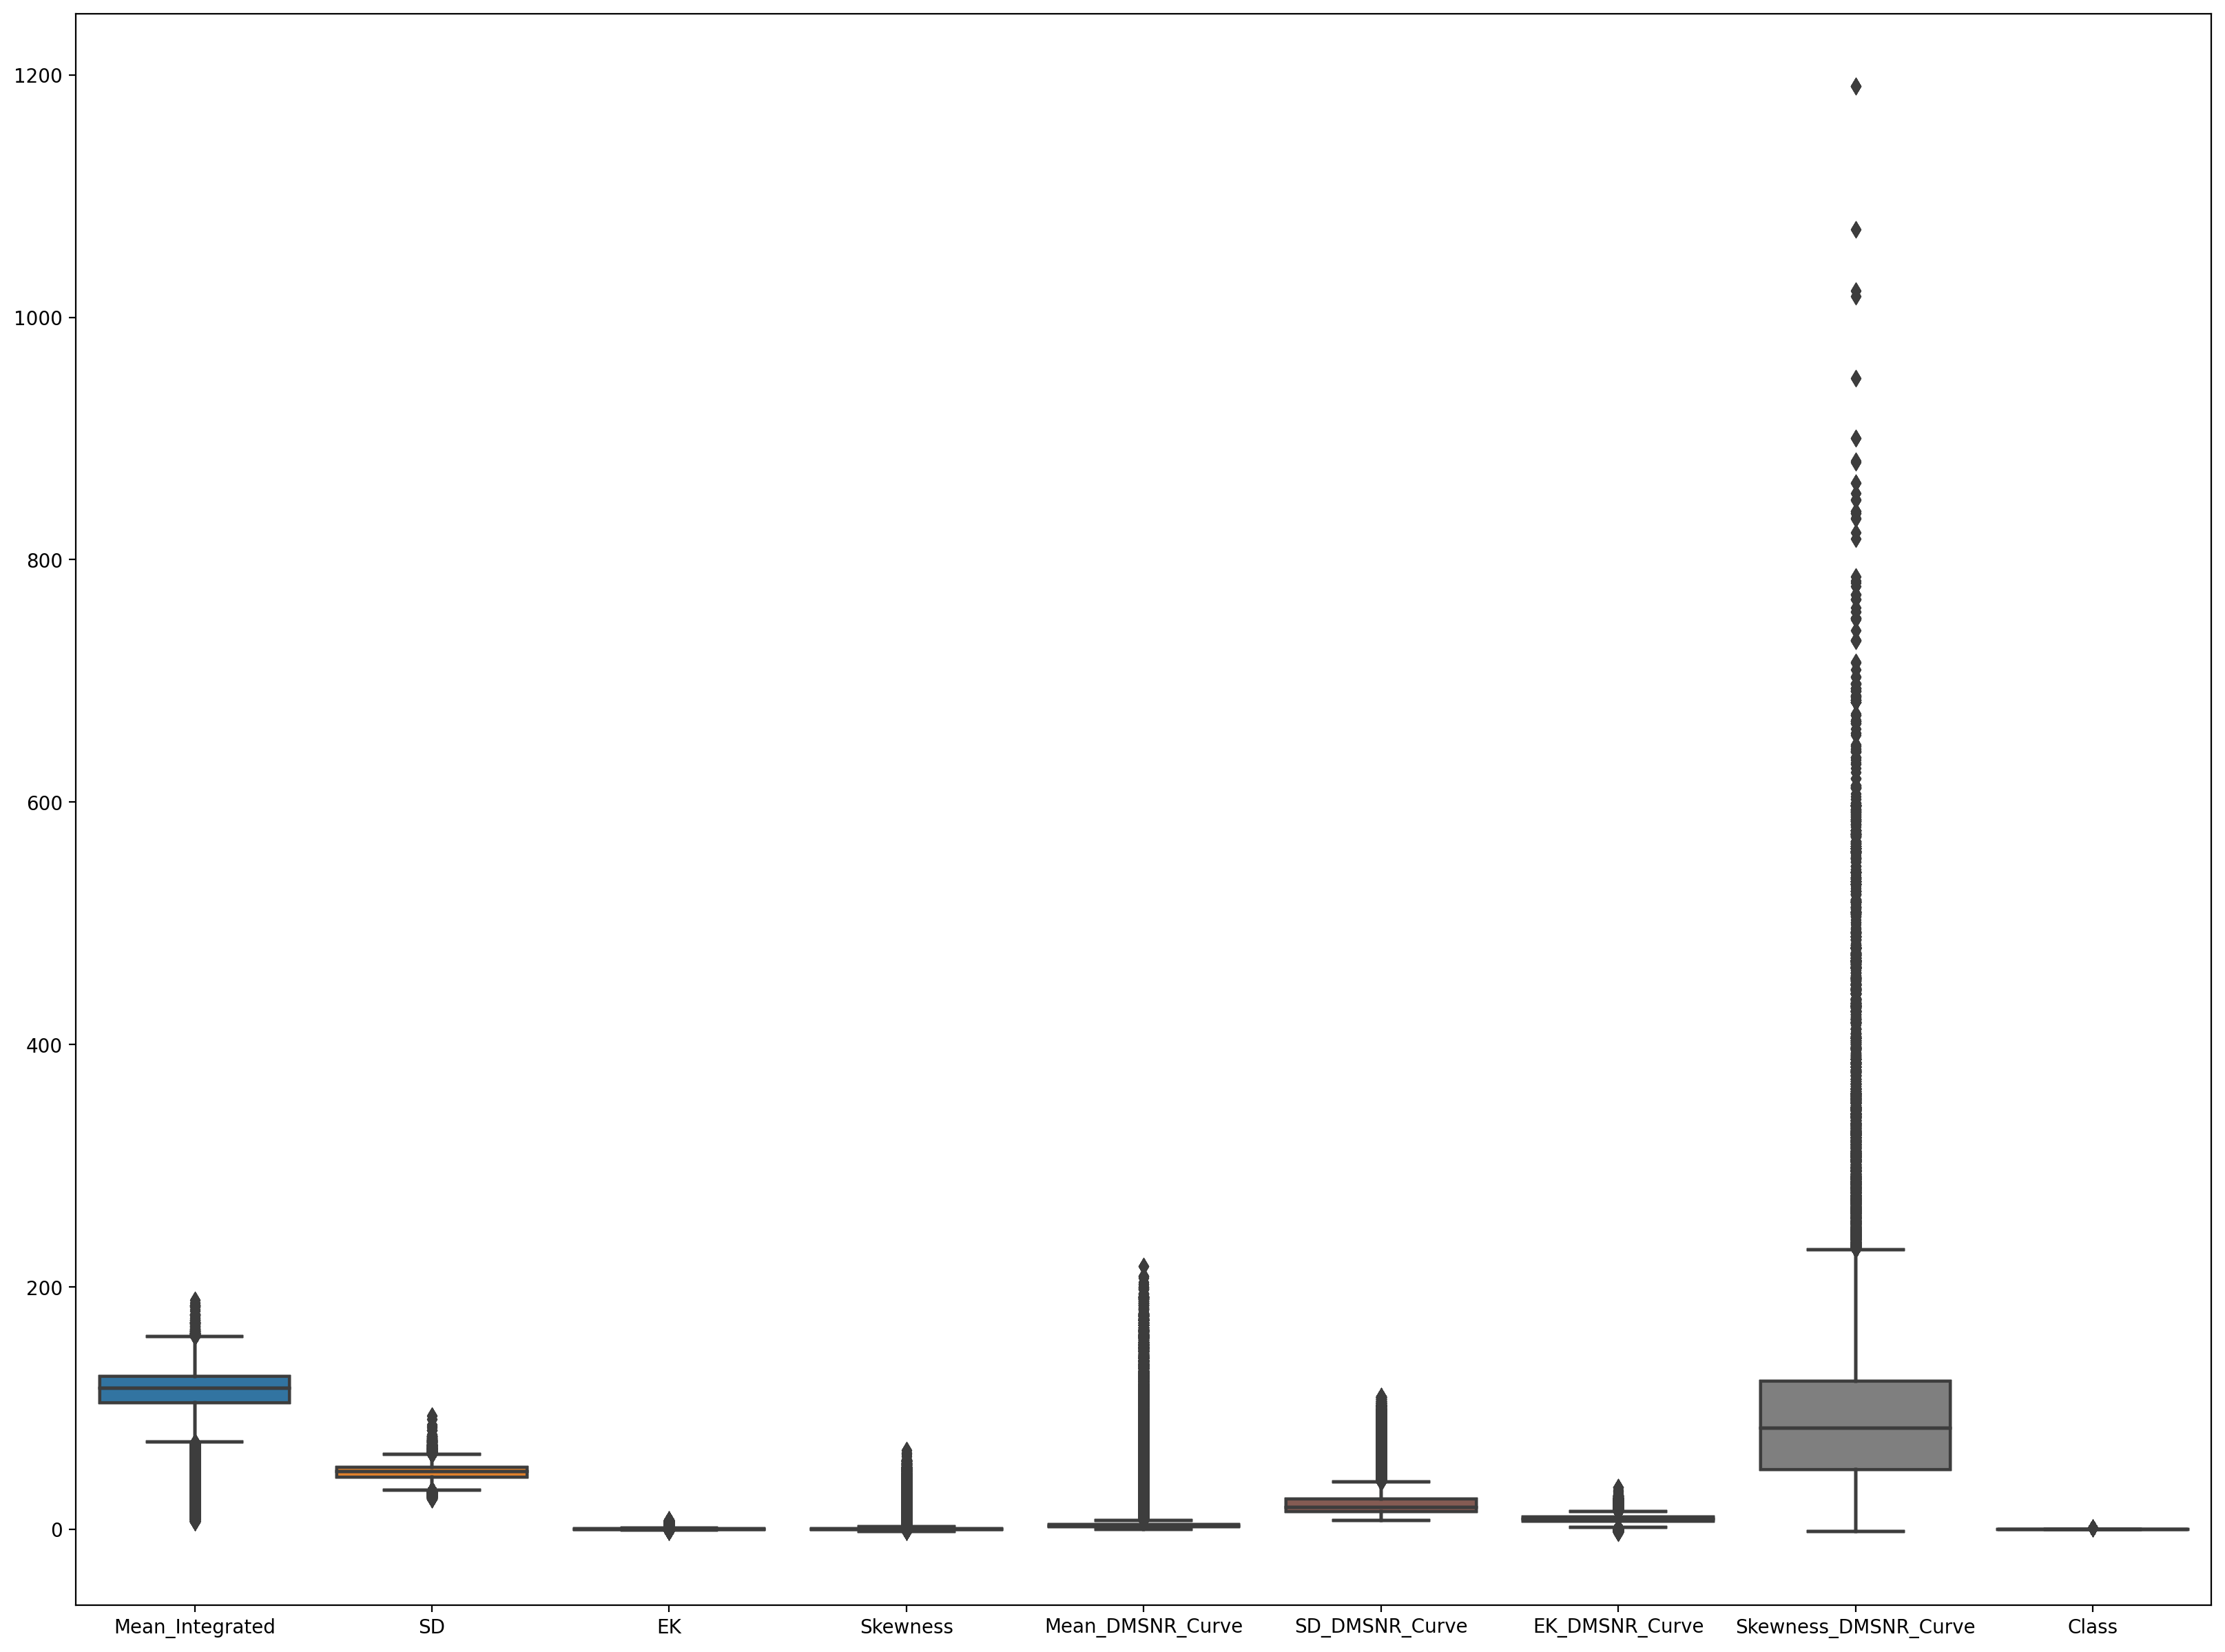

In [22]:
feature=['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve']
fig,ax=plt.subplots(figsize=(20,15))
for i in feature:
    sns.boxplot(data=train)
plt.show()

將離群值移除，這裡因為上圖其實無法看清楚離群值確切數值，故以下程式碼數值是參考別人的

In [37]:
def remove_outlier(train):
    outliers = train[
        (train['Class']==1)&
        (train['Mean_Integrated']>115)&
        (train['SD']>45)&
        (train['EK']<0.03)&
        (train['Skewness']<1)&
        (train['Mean_DMSNR_Curve']<20)].index
    train.drop(outliers,inplace=True)
    train.reset_index()
    return train
train = remove_outlier(train)

將資料標準化，看是否會對結果造成影響，結果沒有。

In [96]:
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
data=train.drop(['Class'],axis=1)
target=train['Class']
#train= pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

因為標準化沒差，試著用minmaxscaler最小最大值標準化數據看結果有何改變

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(train))
print(scaler.data_max_)
print(scaler.transform(train))


MinMaxScaler()
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0.69344528 0.50759926 0.18458263 ... 0.09014205 0.00111273 0.        ]
 [0.44208149 0.16673579 0.2254067  ... 0.25949905 0.04582082 0.        ]
 [0.58144391 0.2184713  0.21959735 ... 0.29057637 0.07345213 0.        ]
 ...
 [0.62026935 0.36612706 0.18679571 ... 0.25735594 0.04890683 0.        ]
 [0.54406751 0.32263051 0.22602661 ... 0.32420725 0.08470528 1.        ]
 [0.58621718 0.38001761 0.18337392 ... 0.13420955 0.00501169 0.        ]]


In [116]:
pd.DataFrame(scaler.transform(train))

0         1         2         3         4         5         6  \
0       0.693445  0.507599  0.184583  0.016203  0.251909  0.611722  0.090142   
1       0.442081  0.166736  0.225407  0.060406  0.014754  0.141383  0.259499   
2       0.581444  0.218471  0.219597  0.040403  0.011593  0.081147  0.290576   
3       0.625298  0.307110  0.169846  0.026849  0.011435  0.132503  0.290318   
4       0.698346  0.478596  0.168880  0.018139  0.004120  0.037891  0.503683   
...          ...       ...       ...       ...       ...       ...       ...   
117551  0.691655  0.464483  0.173844  0.018426  0.017688  0.199704  0.246711   
117552  0.581103  0.403315  0.198780  0.022104  0.006561  0.077658  0.376506   
117553  0.620269  0.366127  0.186796  0.022642  0.016876  0.121128  0.257356   
117554  0.544068  0.322631  0.226027  0.032218  0.008679  0.095593  0.324207   
117555  0.586217  0.380018  0.183374  0.020067  0.106272  0.532932  0.134210   

               7    8  
0       0.001113  0.0  
1       0.045821  0.0  
2       0.073452  0.0  
3       0.060613  0.0  
4       0.260466  0.0  
...          ...  ...  
117551  0.038911  1.0  
117552  0.121136  0.0  
117553  0.048907  0.0  
117554  0.084705  1.0  
117555  0.005012  0.0  

[117556 rows x 9 columns]

In [101]:
#train['Class']=target

In [107]:
train

array([[0.69344528, 0.50759926, 0.18458263, ..., 0.09014205, 0.00111273,
        0.        ],
       [0.44208149, 0.16673579, 0.2254067 , ..., 0.25949905, 0.04582082,
        0.        ],
       [0.58144391, 0.2184713 , 0.21959735, ..., 0.29057637, 0.07345213,
        0.        ],
       ...,
       [0.62026935, 0.36612706, 0.18679571, ..., 0.25735594, 0.04890683,
        0.        ],
       [0.54406751, 0.32263051, 0.22602661, ..., 0.32420725, 0.08470528,
        1.        ],
       [0.58621718, 0.38001761, 0.18337392, ..., 0.13420955, 0.00501169,
        0.        ]])

In [40]:
train_corr = train.corr() 

In [113]:
train_corr

Mean_Integrated        SD        EK  Skewness  \
Mean_Integrated              1.000000  0.668958 -0.907072 -0.820135   
SD                           0.668958  1.000000 -0.636267 -0.632108   
EK                          -0.907072 -0.636267  1.000000  0.966848   
Skewness                    -0.820135 -0.632108  0.966848  1.000000   
Mean_DMSNR_Curve            -0.369134 -0.147818  0.449022  0.440559   
SD_DMSNR_Curve              -0.419918 -0.196065  0.504644  0.479288   
EK_DMSNR_Curve               0.366767  0.172673 -0.445354 -0.423690   
Skewness_DMSNR_Curve         0.244761  0.117441 -0.299980 -0.283728   
Class                       -0.101618 -0.064421  0.111839  0.103730   

                      Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  \
Mean_Integrated              -0.369134       -0.419918        0.366767   
SD                           -0.147818       -0.196065        0.172673   
EK                            0.449022        0.504644       -0.445354   
Skewness                      0.440559        0.479288       -0.423690   
Mean_DMSNR_Curve              1.000000        0.865743       -0.700050   
SD_DMSNR_Curve                0.865743        1.000000       -0.852097   
EK_DMSNR_Curve               -0.700050       -0.852097        1.000000   
Skewness_DMSNR_Curve         -0.429529       -0.611250        0.917312   
Class                         0.057204        0.072439       -0.066543   

                      Skewness_DMSNR_Curve     Class  
Mean_Integrated                   0.244761 -0.101618  
SD                                0.117441 -0.064421  
EK                               -0.299980  0.111839  
Skewness                         -0.283728  0.103730  
Mean_DMSNR_Curve                 -0.429529  0.057204  
SD_DMSNR_Curve                   -0.611250  0.072439  
EK_DMSNR_Curve                    0.917312 -0.066543  
Skewness_DMSNR_Curve              1.000000 -0.046689  
Class                            -0.046689  1.000000

繪製熱力圖

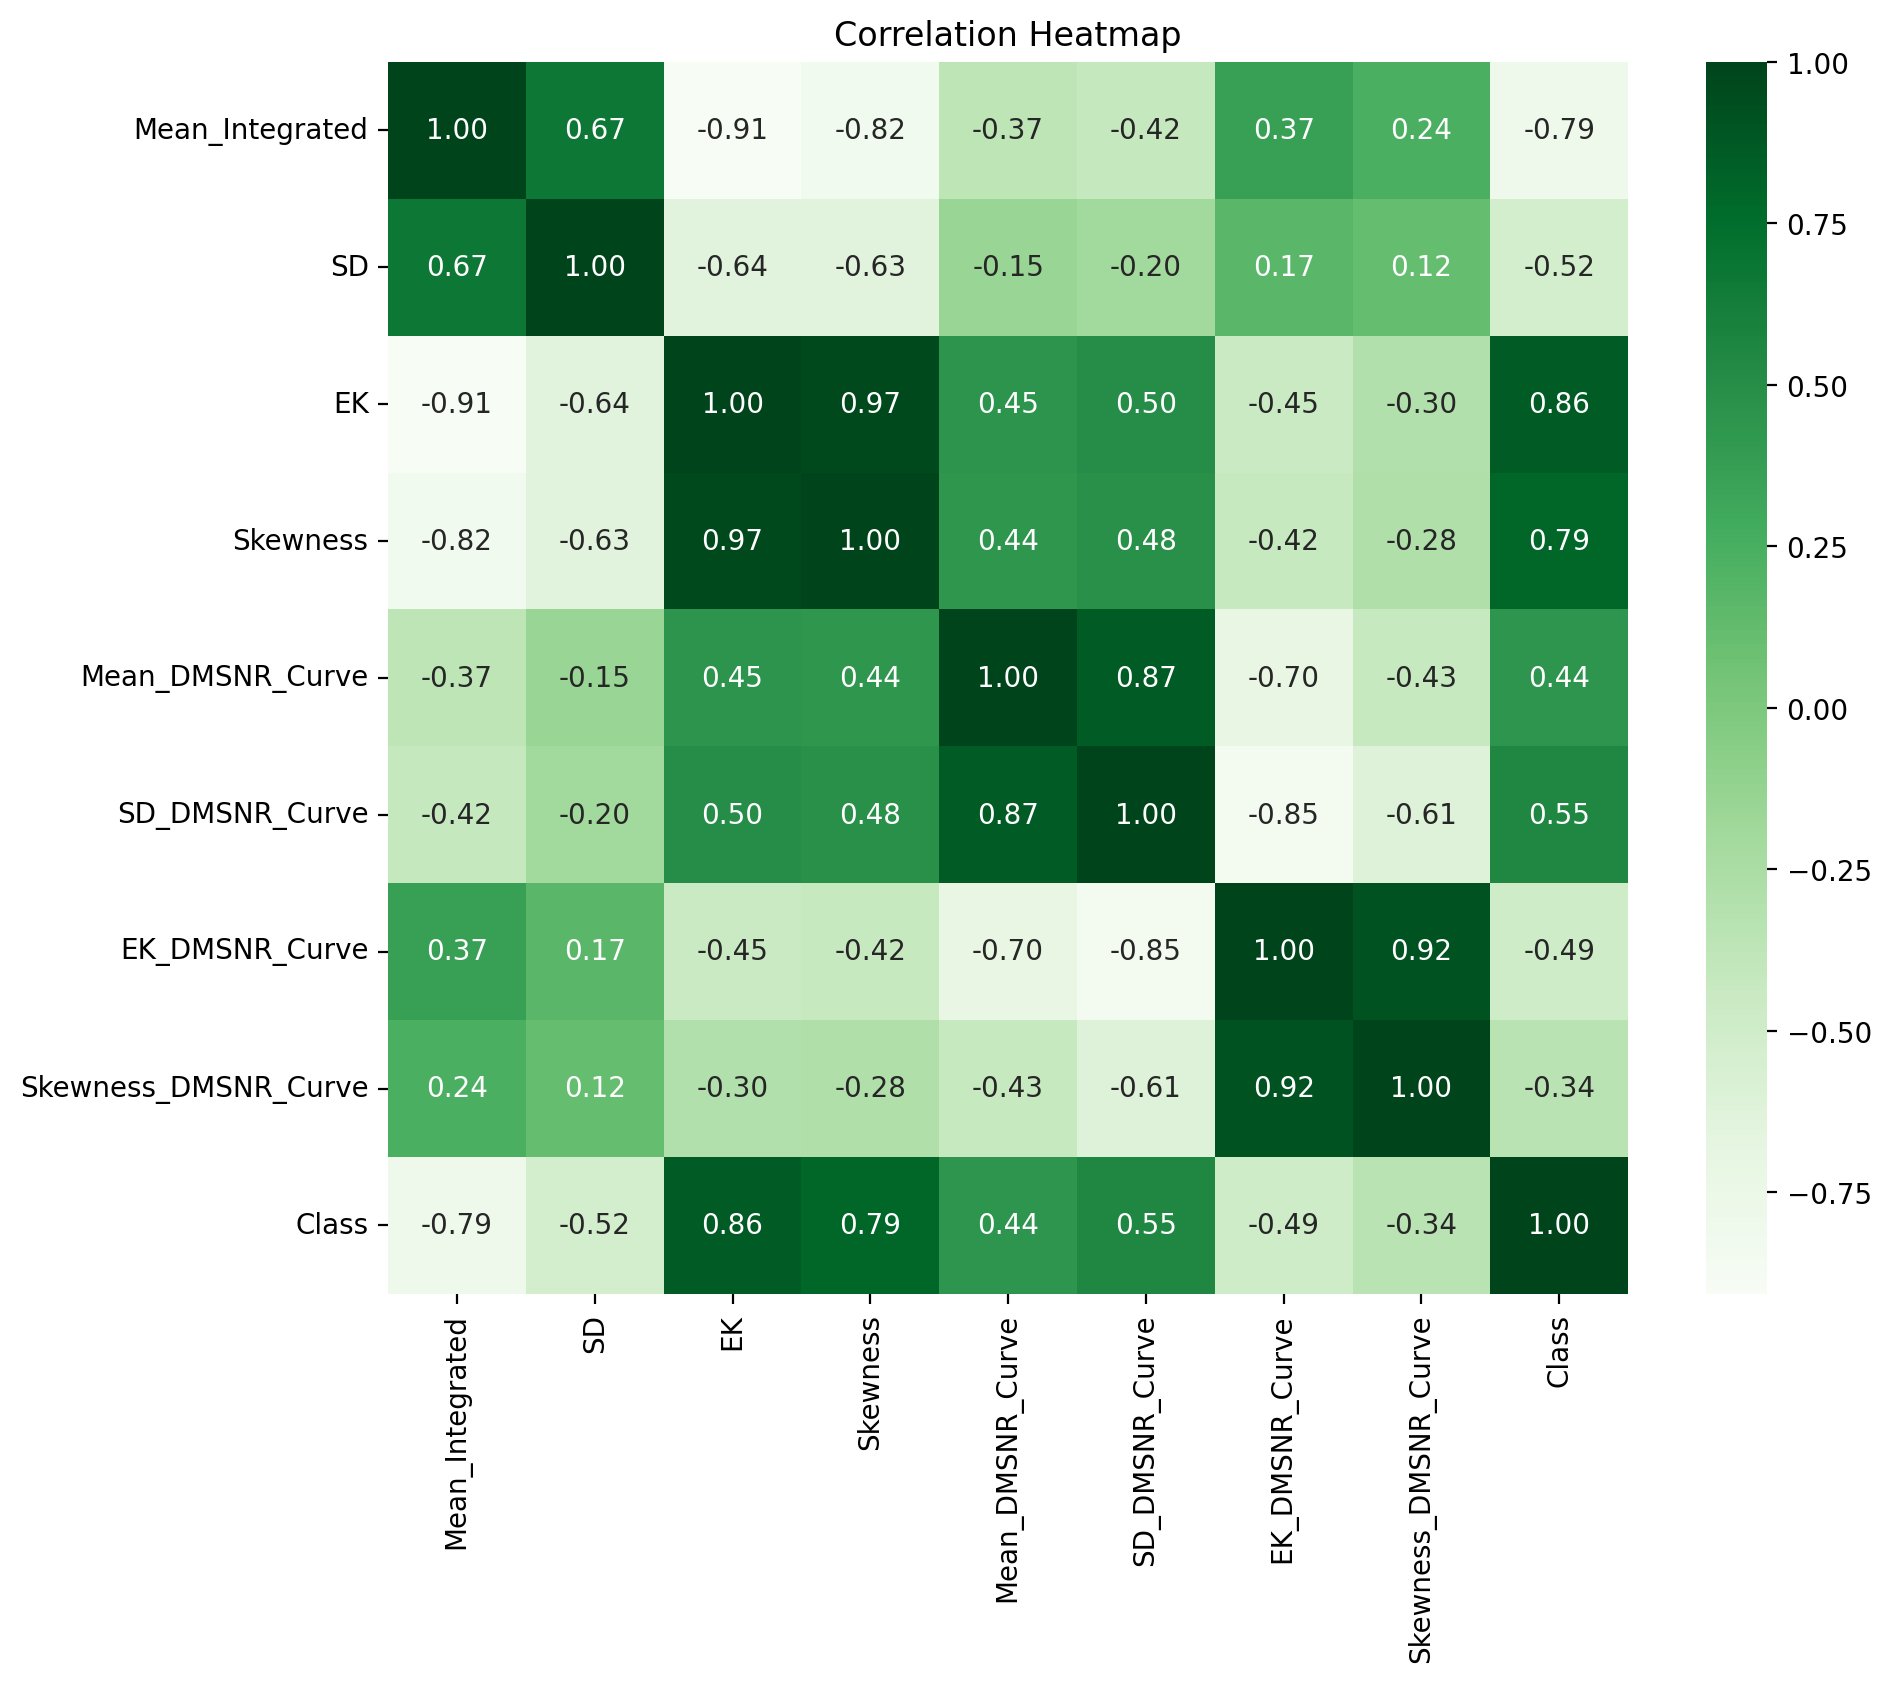

In [ ]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(train.corr(), cmap='Greens', annot=True, fmt='.2f') 
plt.title('Correlation Heatmap') #
plt.show()

繪製散點圖 

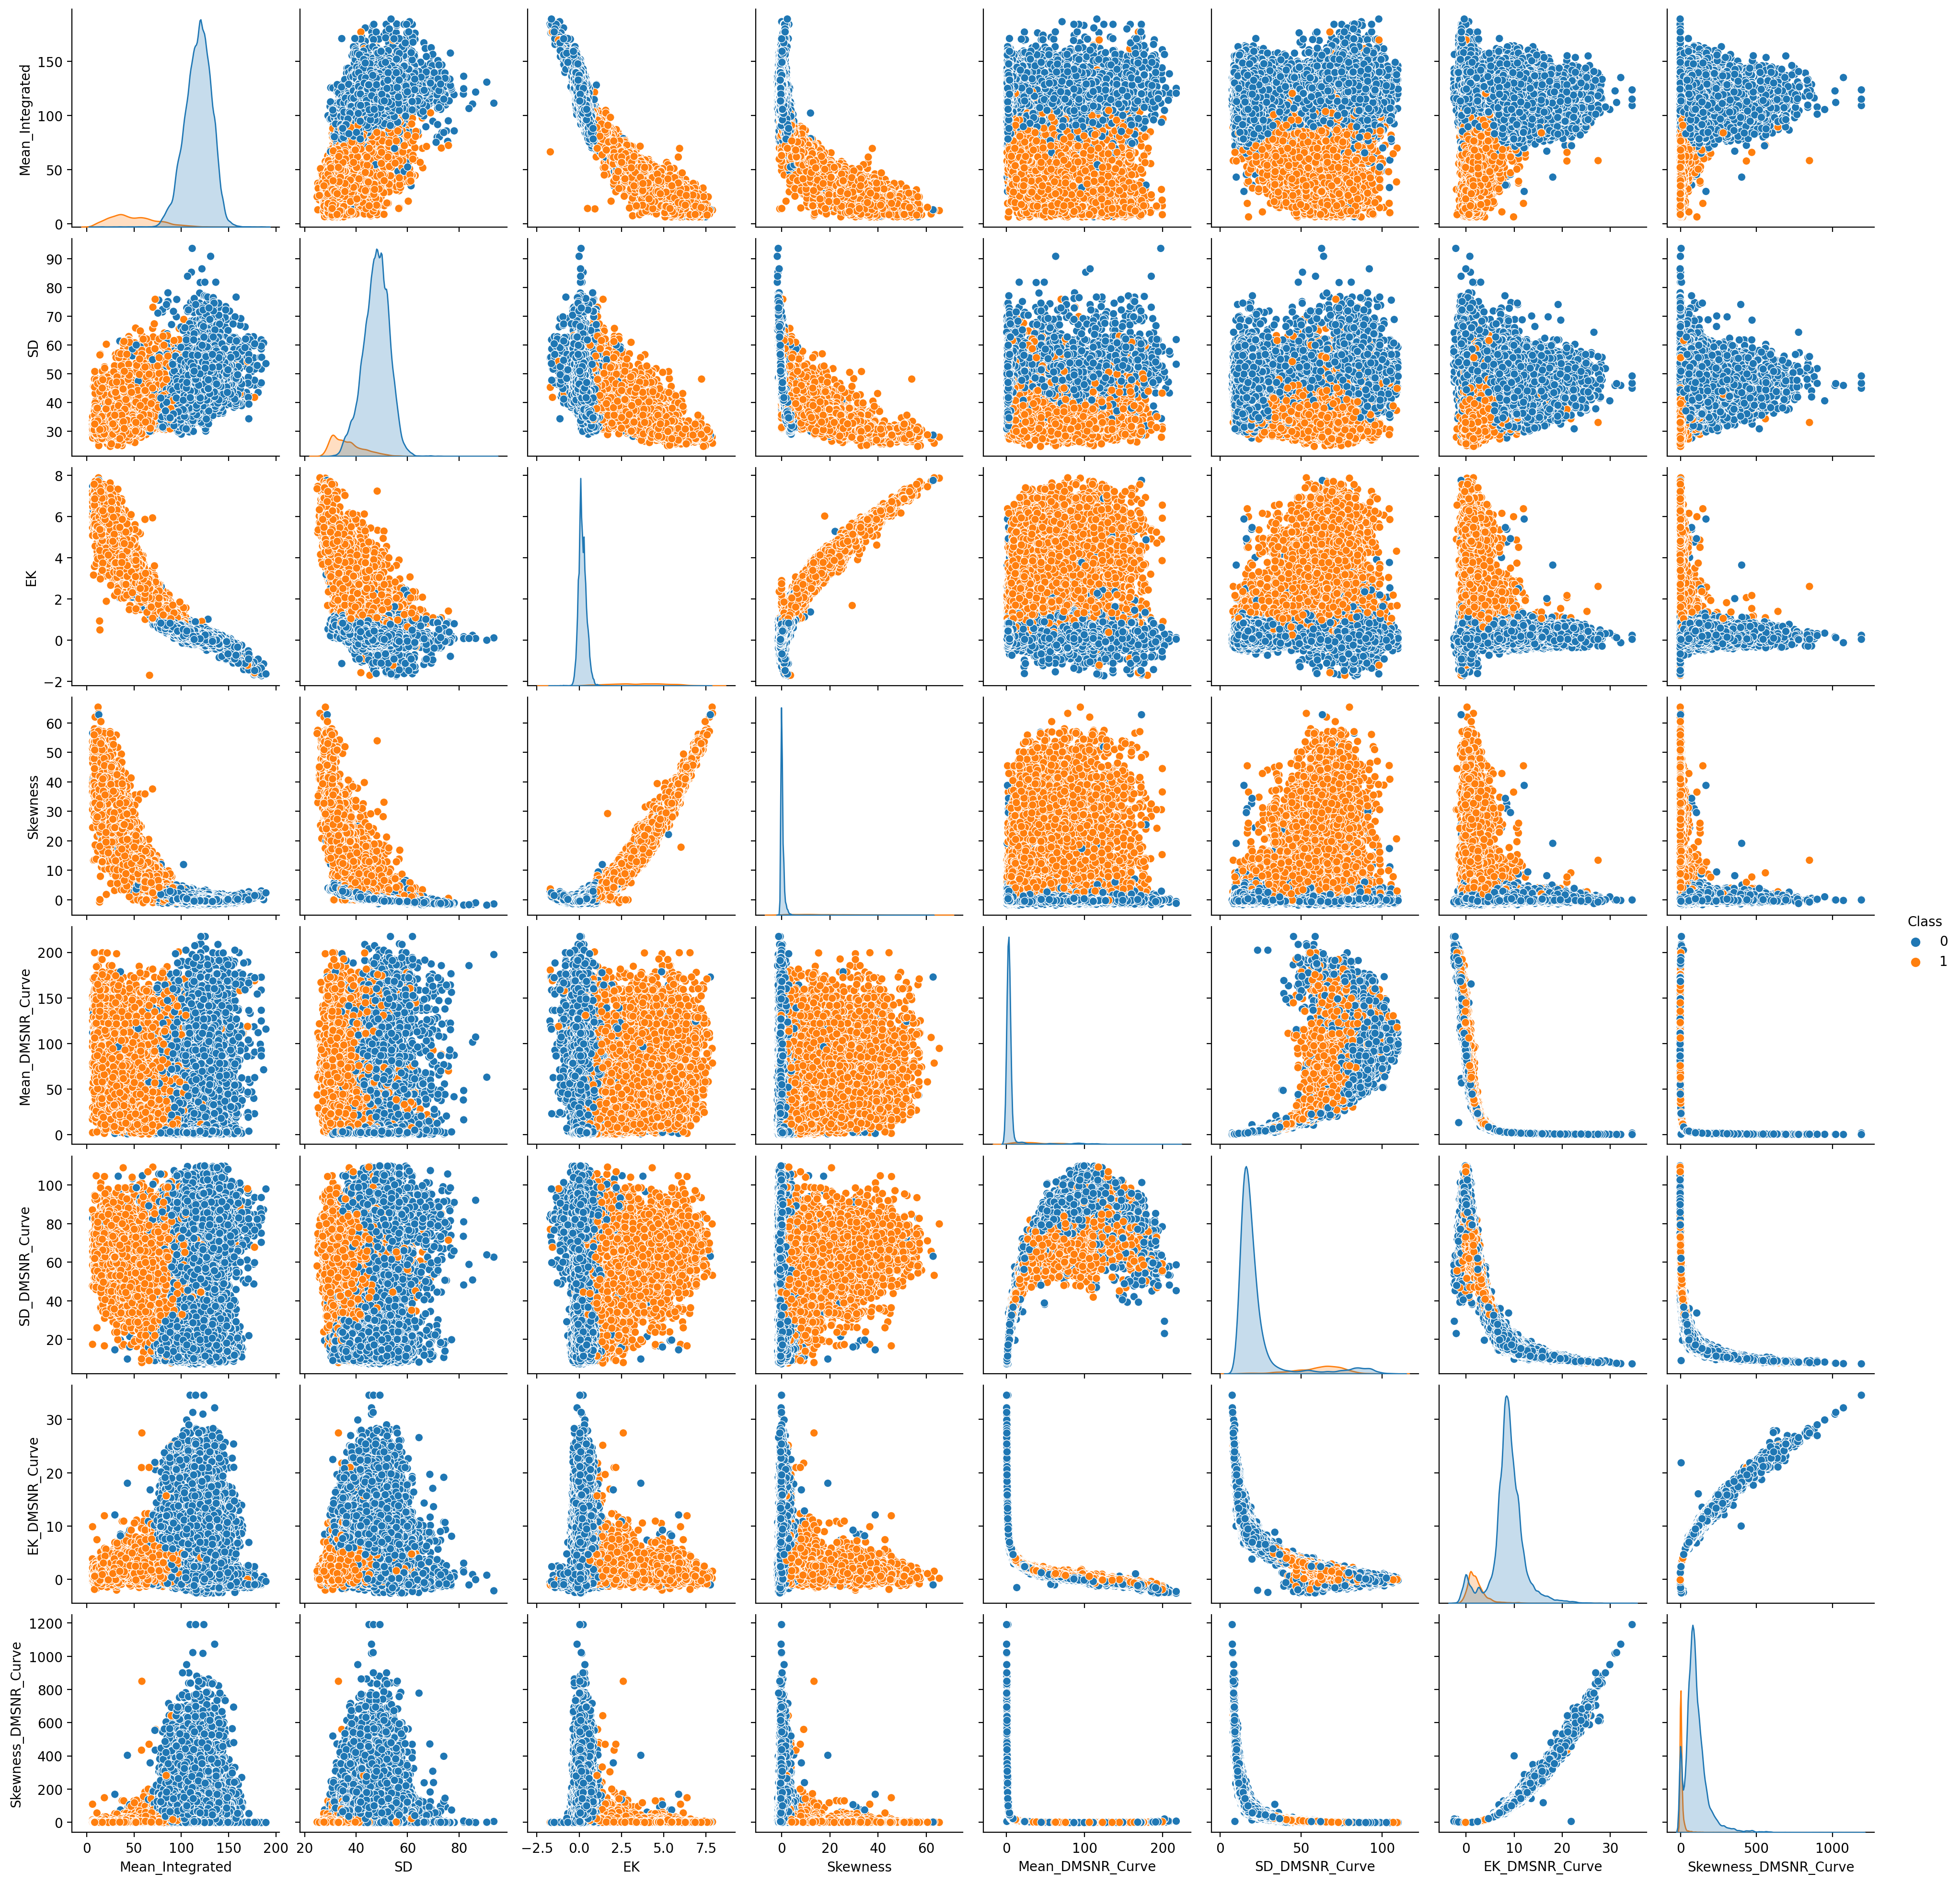

In [14]:
sns.pairplot(data=train,hue="Class") #用class來分類
plt.show()

In [17]:
train.isnull().sum()


Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

In [117]:
x_train

Mean_Integrated        SD        EK  Skewness  Mean_DMSNR_Curve  \
12511          1.079693  1.196379       NaN       NaN               NaN   
60873               NaN       NaN       NaN       NaN               NaN   
77783          0.788556  0.197539       NaN       NaN               NaN   
72105               NaN       NaN       NaN       NaN               NaN   
100178              NaN  0.620355       NaN       NaN               NaN   
...                 ...       ...       ...       ...               ...   
27675          0.576723       NaN       NaN       NaN               NaN   
60246               NaN       NaN  0.179390       NaN               NaN   
70151          0.797062  1.078286       NaN       NaN               NaN   
96996               NaN       NaN  0.545049  0.425584               NaN   
56189               NaN       NaN  1.680506  1.704446          0.840597   

        SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
12511              NaN        0.917816              0.941962    0.0  
60873              NaN        0.223598                   NaN    1.0  
77783              NaN        0.975600              1.175493    0.0  
72105              NaN        1.033467              1.062050    0.0  
100178             NaN        0.846357              0.862026    0.0  
...                ...             ...                   ...    ...  
27675              NaN             NaN                   NaN    0.0  
60246              NaN        0.803078              0.655434    0.0  
70151              NaN        0.395832                   NaN    1.0  
96996              NaN        0.723874              0.640030    1.0  
56189          1.25763             NaN                   NaN    0.0  

[94044 rows x 9 columns]

In [144]:
y=train["Class"]

y=y[y.isna()!=True]

In [98]:
y.isna().sum()

0

In [99]:
train=train[train['Class'].isna()!=True]

將資料導入邏輯迴歸模型

In [129]:
train=pd.DataFrame(scaler.transform(train))
train.columns=['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class']
x=train.drop(['Class'],axis=1)
x=np.sqrt(x)

y=train['Class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=45)
pd.Series(y_train).value_counts(normalize=True)
pd.Series(y_test).value_counts(normalize=True)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)

c:\Users\02092\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [130]:
from sklearn.metrics import confusion_matrix,accuracy_score

confusion_matrix(y_test,predictions)

array([[21319,     0],
       [ 2193,     0]], dtype=int64)

In [131]:
x_test

Mean_Integrated        SD        EK  Skewness  Mean_DMSNR_Curve  \
51229          0.777770  0.524313  0.436798  0.178204          0.119341   
23893          0.815016  0.501562  0.421508  0.182595          0.108775   
2970           0.825021  0.647740  0.423758  0.154724          0.694912   
82354          0.722843  0.491343  0.471883  0.206300          0.108047   
39136          0.808322  0.536988  0.456044  0.183053          0.130808   
...                 ...       ...       ...       ...               ...   
2969           0.718378  0.573454  0.485976  0.183688          0.097560   
22640          0.742705  0.612096  0.444864  0.160972          0.133848   
26043          0.798962  0.649846  0.419996  0.135820          0.109744   
104526         0.741614  0.641832  0.432387  0.145141          0.099281   
46046          0.831351  0.599250  0.441034  0.161493          0.096668   

        SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  
51229         0.369301        0.520762              0.230836  
23893         0.312195        0.550502              0.272930  
2970          0.898523        0.251158              0.008301  
82354         0.367442        0.530398              0.237100  
39136         0.411390        0.514418              0.219436  
...                ...             ...                   ...  
2969          0.250936        0.572440              0.323586  
22640         0.411272        0.502352              0.206906  
26043         0.272946        0.544282              0.278215  
104526        0.267797        0.560776              0.304855  
46046         0.327513        0.573555              0.296579  

[23512 rows x 8 columns]

In [132]:
x_test.shape

(23512, 8)

In [133]:
accuracy_score(y_test,predictions)


0.9067284790745151

In [135]:
#test=test.drop(['id'],axis=1)
predictions=model.predict_proba(test)

In [136]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [139]:
y_train.shape

(94044,)

In [140]:
predictcat=model.predict(x_train)

In [143]:
predictcat

array([0., 0., 0., ..., 0., 0., 0.])

In [142]:
log_loss(y_train,predictcat)

3.3612228342324597

In [66]:
sample=pd.read_csv('./sample_submission.csv')
sampleid=sample['id']

In [69]:
type(predictions)

numpy.ndarray

In [71]:
predictions.shape

(78377, 2)

In [75]:
predictions[:,0] #[第一個維度,第二個維度] 冒號是從頭取到尾

array([1.19961374e-10, 8.88178420e-16, 1.39151834e-05, ...,
       6.79678536e-13, 5.95012928e-12, 8.37468688e-01])

In [77]:
df=pd.DataFrame(
    {
    'id':sample['id'],
    'Class':predictions[:,0]
    }
)

In [80]:
df.to_csv('./sample_submission.csv',index=False)

In [86]:
x

Mean_Integrated        SD        EK  Skewness  Mean_DMSNR_Curve  \
0              0.880291  2.130658 -0.408473 -0.397489          1.607552   
1             -0.969782 -1.713212 -0.060380  0.058259         -0.319823   
2              0.055945 -1.129798 -0.109914 -0.147979         -0.345514   
3              0.378720 -0.130237 -0.534126 -0.287727         -0.346797   
4              0.916364  1.803596 -0.542361 -0.377529         -0.406251   
...                 ...       ...       ...       ...               ...   
117555         0.867116  1.644442 -0.500039 -0.374575         -0.295979   
117556         0.053436  0.954658 -0.287413 -0.336646         -0.386412   
117557         0.341706  0.535296 -0.389603 -0.331100         -0.302582   
117558        -0.219150  0.044791 -0.055094 -0.232368         -0.369201   
117559         0.091077  0.691937 -0.418780 -0.357653          0.423947   

        SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  
0             2.190100       -1.897393             -1.182228  
1            -0.215807       -0.259905             -0.515213  
2            -0.523928        0.040577             -0.102972  
3            -0.261232        0.038078             -0.294525  
4            -0.745195        2.101069              2.687156  
...                ...             ...                   ...  
117555        0.082519       -0.383548             -0.618307  
117556       -0.541779        0.871422              0.608437  
117557       -0.319415       -0.280627             -0.469172  
117558       -0.450037        0.365749              0.064917  
117559        1.787068       -1.471311             -1.124058  

[117556 rows x 8 columns]

In [89]:
y.value_counts()

0.0    106593
1.0     10963
Name: Class, dtype: int64

將資料導入XGBoost看看結果

In [91]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)
xgbc.fit(x_train,y_train)
predictxgboost=xgbc.predict_proba(test)


In [92]:
xgdf=pd.DataFrame(
    {
    'id':sample['id'],
    'Class':predictxgboost[:,0]
    }
)

In [93]:
df.to_csv('./sample_submissionxgboost.csv',index=False)

-
跟上課內容的關聯性:跟鐵達尼號生存預測一樣使用邏輯迴歸模型
-

延伸學習內容

1.分層抽樣:
機器學習需要使用訓練集和測試集來訓練和評估模型的性能。在隨機選擇樣本時，分層抽樣能確保每個類別的樣本在訓練集和測試集中的比例是一樣的。如果使用隨機抽樣而沒有進行分層，可能會導致某些類別在訓練集或測試集中的樣本數過少或過多，進而影響模型的訓練和評估結果。這樣可能會導致模型在某些類別上出現偏差。

2.分類樹模型
隨機森林:
由多個決策樹組成，使用 Bagging 加上隨機特徵採樣的方法所產生出來的整體學習演算法，可以更好的觀察每個特徵重要性，以多個弱學習器來結合成一個強穩的模型，比較不會有偏差或是發生高度適配。

梯度下降:一種常用的最優化算法，將函數的梯度方向作為下降方向，不斷迭代地調整參數的值，以實現接近最優解。在機器學習中，梯度下降是一個重要的算法，用於求解模型參數的最優值。

梯度提升決策樹:XGBoost/LightGBM/CatBoost
由多個弱學習器的加權組合來構建一個強大的模型，通過梯度下降的方式不斷地優化模型的預測表現。

4.Confusion Matrix
二元分類任務的評價指標，二元分類會有分類正確的狀況，也有誤判的情況，使用混淆矩陣能看出預測值和真實值的關係，還可以用來比較不同模型之間的效能，從而幫助選擇最適合的模型。真正例、假正例、真反例和假反例這四個指標可以用來計算模型的精確率、召回率（Recall）、F1值等性能指標。

-
比賽結果說明:
用邏輯迴歸跟XGBoost訓練出來的結果一樣，獲得的score: 0.47266

-
推測還可以從哪些方式改善

1.邏輯迴歸

合併某些特徵的數值:
這是一份天文資料，或許某些特徵的數值合併後能獲得更好的預測結果。

將數值轉為常態分佈:
使用對數轉換使特徵數值有左偏或右偏的數值趨近於常態分佈

2.XGBoost

使用GridSearchCV:
在訓練模型前先使用GridSearchCV找出最佳的超參數組合。使用固定的超參數，可能並非適用於所給定的數據。GridSearchCV使用交叉驗證來評估不同超參數下的模型性能，能防止對訓練數據的過度適配。 
-

參考資料
https://github.com/andy6804tw/2021-13th-ironman/tree/main/23.%E8%B3%87%E6%96%99%E5%88%86%E5%B8%83%E8%88%87%E9%9B%A2%E7%BE%A4%E5%80%BC%E8%99%95%E7%90%86
https://medium.com/@pahome.chen/xgboost%E5%85%A5%E9%96%80%E7%B6%93%E9%A9%97%E5%88%86%E4%BA%AB-e06931b835f5
https://ithelp.ithome.com.tw/articles/10264416
https://ithelp.ithome.com.tw/articles/10222033
https://www.twblogs.net/a/5b7fe16a2b717767c6b242d5
https://medium.com/python-%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96/python-%E5%95%86%E6%A5%AD%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90%E4%B9%8B%E5%8F%AF%E8%A6%96%E5%8C%96%E7%B9%AA%E5%9C%96-%E7%AC%AC19%E8%AC%9B-%E7%86%B1%E5%8A%9B%E5%9C%96-seaborn-heatmap-cf1b17d7964e
https://medium.com/python-%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96/python-%E5%95%86%E6%A5%AD%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90%E4%B9%8B%E5%8F%AF%E8%A6%96%E5%8C%96%E7%B9%AA%E5%9C%96-%E7%AC%AC11%E8%AC%9B-%E7%AE%B1%E5%BD%A2%E5%9C%96-seaborn-bar-%E4%B8%80-20f93b2c495b
https://www.twblogs.net/a/5cce310abd9eee6726c8beb5
https://ithelp.ithome.com.tw/articles/10301273